Reproduce the figure in Makela 2008 manuscript

In [1]:
from modules.cn_allocation import Makela08_alloc_parameter, Makela08_alloc_mainsolver, Makela08_alloc_auxvar_solver
import numpy as np
import matplotlib.pyplot as plt

params_dict = Makela08_alloc_parameter.get_param_dict(dict_name="params_makela08_pine")
psi_r_solver = Makela08_alloc_mainsolver.PsiRCubicEqnSolver(params_dict)
G_numeric_solver = Makela08_alloc_mainsolver.BiomassProductionOptimizerNumeric(psi_r_solver, params_dict)

Original axis N availability: 10\~50 kg N/t FR/yr, convert to 0.01\~0.05 kg N/kg FR/yr

In [8]:
plt4a_DM_alloc_fraction_list = [] # [[Nup_max_specific, DM_foliage, DM_wood, DM_root], [], ...]
plt2_NconcF_prod_list = []

for Nup_max_specific in np.arange(10, 50+1, 1)/1000:  # Nup_max_specific
    
    print("Calculation: Nup_max_specific =", Nup_max_specific)
    
    Nconc_foliage_opt, DM_production_opt = G_numeric_solver.optimize_total_biomass_production(Nup_max_specific)
    
    downstream_var_solver = Makela08_alloc_auxvar_solver.DownstreamValueSolver(
        params_dict, Nup_max_specific, Nconc_foliage_opt, DM_production_opt)
    
    DM_foliage, DM_wood, DM_root = downstream_var_solver.solve_optimum_biomass(method="C")
    
    plt4a_DM_alloc_fraction_list.append([Nup_max_specific, DM_foliage, DM_wood, DM_root, float(DM_foliage+DM_wood+DM_root)])
    
    plt2_NconcF_prod_list.append([Nup_max_specific, Nconc_foliage_opt, DM_production_opt])

Calculation: Nup_max_specific = 0.01
Calculation: Nup_max_specific = 0.014
Calculation: Nup_max_specific = 0.018
Calculation: Nup_max_specific = 0.022
Calculation: Nup_max_specific = 0.026
Calculation: Nup_max_specific = 0.03
Calculation: Nup_max_specific = 0.034
Calculation: Nup_max_specific = 0.038
Calculation: Nup_max_specific = 0.042
Calculation: Nup_max_specific = 0.046
Calculation: Nup_max_specific = 0.05


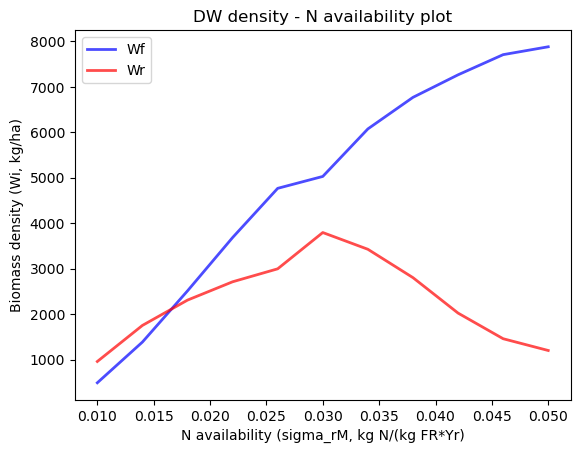

In [14]:
Nmax_vec1 = [pair[0] for pair in plt4a_DM_alloc_fraction_list]
Wf_vec = [pair[1] for pair in plt4a_DM_alloc_fraction_list]
Ww_vec = [pair[2] for pair in plt4a_DM_alloc_fraction_list]
Wr_vec = [pair[3] for pair in plt4a_DM_alloc_fraction_list]

fig1 = plt.figure("Figure 1")
plt.plot(Nmax_vec1, Wf_vec, color='blue', linestyle='-', linewidth=2, alpha=0.7, label='Wf')
plt.plot(Nmax_vec1, Wr_vec, color='red', linestyle='-', linewidth=2, alpha=0.7, label="Wr")
plt.title('DW density - N availability plot')
plt.xlabel('N availability (sigma_rM, kg N/(kg FR*Yr)')
plt.ylabel('Biomass density (Wi, kg/ha)')
plt.legend()
plt.show()  # Display the plot

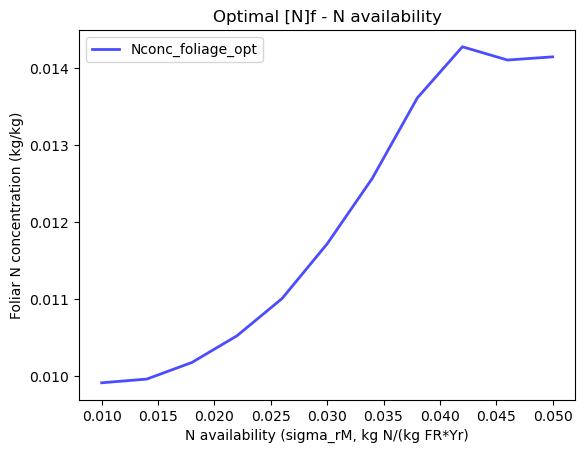

In [15]:
Nmax_vec2 = [pair[0] for pair in plt2_NconcF_prod_list]
Nconc_foliage_opt_vec = [pair[1] for pair in plt2_NconcF_prod_list]
DM_production_opt_vec = [pair[2] for pair in plt2_NconcF_prod_list]

fig2 = plt.figure("Figure 2")
plt.plot(Nmax_vec2, Nconc_foliage_opt_vec, color='blue', linestyle='-', linewidth=2, alpha=0.7, label='Nconc_foliage_opt')
plt.title('Optimal [N]f - N availability')
plt.xlabel('N availability (sigma_rM, kg N/(kg FR*Yr)')
plt.ylabel('Foliar N concentration (kg/kg)')
plt.legend()
plt.show()  # Display the plot

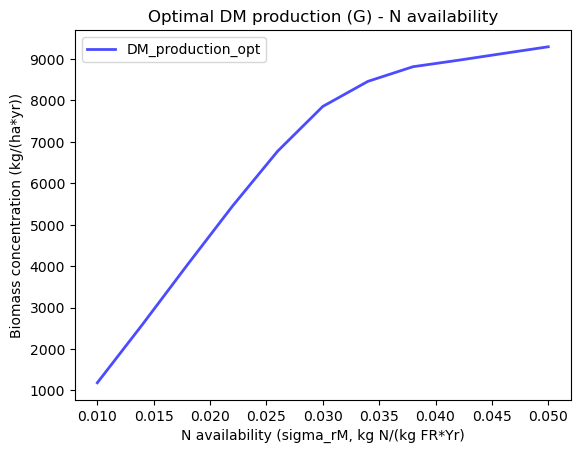

In [17]:
fig3 = plt.figure("Figure 3")
plt.plot(Nmax_vec2, DM_production_opt_vec, color='blue', linestyle='-', linewidth=2, alpha=0.7, label='DM_production_opt')
plt.title('Optimal DM production (G) - N availability')
plt.xlabel('N availability (sigma_rM, kg N/(kg FR*Yr)')
plt.ylabel('Biomass concentration (kg/(ha*yr))')
plt.legend()
plt.show()  # Display the plot